In [2]:
import ee
import xarray as xr
import pandas as pd
import numpy as np
import dask.array as da
import xee
from bbox import * 
from datetime import datetime

# Trigger the authentication flow
ee.Authenticate()

# Initialize the Earth Engine library
ee.Initialize(project='satellite-modeling')

# Define the rectangle that encompasses Louisiana and Texas
bbox = ee.Geometry.Rectangle([lon_min, lat_min, lon_max, lat_max])

start_date = '2023-08-01T00:00'
end_date = datetime.now().strftime('%Y-%m-%dT%H:%M')

In [10]:
##################################################
# Load Tree Cover Data
##################################################
# List of climate variables to download from NLDAS
variables = ['Percent_Tree_Cover', 'Percent_NonTree_Vegetation', 'Percent_NonVegetated']
# Load NLDAS hourly data and filter by region and date
dataset = ee.ImageCollection("MODIS/006/MOD44B") \
            .filterBounds(bbox) \
            .select(variables)

ds = xr.open_dataset(dataset, engine='ee', crs='EPSG:4326', scale=0.01)
# Filter the dataset based on the latitude and longitude bounds
ds = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

In [12]:
ds = ds.sel(time='2020-03-05T00:00:00.000000000')

In [15]:
ds['Percent_Tree_Cover']=ds['Percent_Tree_Cover'].fillna(0)
ds['Percent_NonTree_Vegetation']=ds['Percent_NonTree_Vegetation'].fillna(0)
ds['Percent_NonVegetated']=ds['Percent_NonVegetated'].fillna(100)

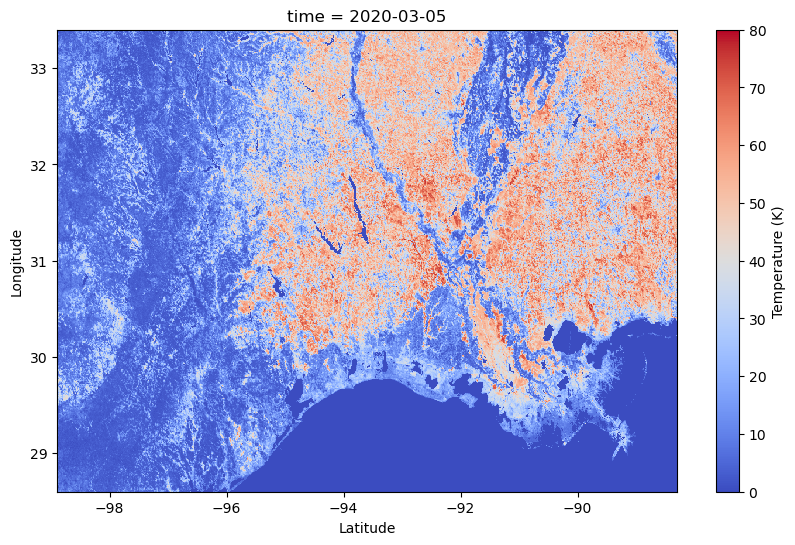

In [18]:
import matplotlib.pyplot as plt
# # Define your latitude and longitude bounds
# lat_min, lat_max = 28.6, 33.4  # Example latitude range
# lon_min, lon_max = -98.9, -88.3  # Example longitude range

# Select one hour of temperature data (e.g., the first timestamp)
hour_index = 1  # Change this to select a different hour if desired
# temperature_data = nldas_month['temperature'].isel(time=hour_index)
temperature_data = ds['Percent_Tree_Cover']

# Plot the data with switched axes
plt.figure(figsize=(10, 6))

# Plot with latitude on x-axis and longitude on y-axis
temperature_data.T.plot(
    cmap="coolwarm",  # Colormap for temperature visualization
    cbar_kwargs={'label': 'Temperature (K)'}  # Add color bar label
)

# Update axis labels
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()

In [19]:
ds.to_netcdf(f'../../data/other/tree_cover.nc', engine='h5netcdf')